# Group Assignment

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import pandas_datareader.data as web

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.optimize import minimize
from scipy import stats

import statsmodels.api as sm

## PART I

## Examination of the January Effect
### The January Effect's main hypothesis states that stock returns are, on average, higher during January than during other months.

### 1. Download pricing data from Yahoo!Finance for each of the stocks in the ticker_list below and compute the continuously compounded daily returns using the Adjusted Closing price. Store these daily returns in a DataFrame called returns. Label the columns as 'RET_ticker', where ticker represents the trading symbol of the stock whose returns are stored in that column.

In [2]:
ticker_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']

In [3]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2019, 12,31)
yahoo = web.DataReader(ticker_list, 'yahoo', start,end)


In [4]:
yahoo.head()

Attributes  Adj Close                                                         \
Symbols          AAPL        AXP         BA        CAT       CSCO        CVX   
Date                                                                           
2013-01-02  68.687538  52.794613  64.088791  74.283417  16.198055  83.131775   
2013-01-03  67.820526  53.019272  64.421425  74.998421  16.285658  82.777863   
2013-01-04  65.931404  53.567421  64.604370  75.411537  16.309542  83.214630   
2013-01-07  65.543602  53.792095  63.307129  75.641953  16.158239  82.649834   
2013-01-08  65.719994  54.097630  61.643993  74.680672  16.174168  82.280815   

Attributes                                                ...     Volume  \
Symbols           DIS          GS         HD         IBM  ...        NKE   
Date                                                      ...              
2013-01-02  46.454643  118.254135  54.007660  149.965622  ...  7512800.0   
2013-01-03  46.554642  117.607460  53.854519  149.140732  ...  7232200.0   
2013-01-04  47.445557  120.813934  53.752422  148.163147  ...  6794000.0   
2013-01-07  46.336468  120.589355  53.463146  147.513916  ...  6489400.0   
2013-01-08  46.145550  119.502602  53.786449  147.307709  ...  6714200.0   

Attributes                                                           \
Symbols            PFE         PG        TRV         UNH        UTX   
Date                                                                  
2013-01-02  33522200.0  9987000.0  2886500.0   5358100.0  4485200.0   
2013-01-03  33757400.0  7741900.0  2124800.0  14413200.0  3786600.0   
2013-01-04  28604900.0  5853700.0  2013300.0  10458000.0  3855900.0   
2013-01-07  25779900.0  5269800.0  2207500.0   7804500.0  3378500.0   
2013-01-08  31057000.0  7362000.0  1431200.0   8196200.0  4830600.0   

Attributes                                                  
Symbols              V          VZ         WMT         XOM  
Date                                                        
2013-01-02  15826400.0  16483900.0  10390800.0  16143700.0  
2013-01-03  14937200.0  11227700.0   8910100.0  13268200.0  
2013-01-04  10376000.0  14930400.0   6438000.0  11427900.0  
2013-01-07  10242400.0  20891300.0   6201400.0  11799800.0  
2013-01-08  11800400.0  21394400.0   5866900.0  14226400.0  

[5 rows x 168 columns]

In [5]:
adj_close = yahoo['Adj Close']
tickers = adj_close.columns

In [6]:
returns = pd.DataFrame() 
for ticker in tickers:
    returns['RET_'+ticker]= np.log(adj_close[ticker]/adj_close[ticker].shift(1))
    
returns.head() # return for each ticker 

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012703,0.004246,0.005177,0.009579,0.005394,-0.004266,0.002150,-0.005484,-0.002840,-0.005516,...,0.010172,-0.002319,-0.006361,0.007657,-0.047883,0.003684,0.000772,-0.004755,-0.006375,-0.001805
2013-01-04,-0.028250,0.010286,0.002836,0.005493,0.001465,0.005263,0.018956,0.026899,-0.001898,-0.006576,...,0.009691,0.004246,0.002028,0.008680,0.001922,0.007915,0.008134,0.005432,0.003772,0.004620
2013-01-07,-0.005899,0.004185,-0.020284,0.003051,-0.009320,-0.006810,-0.023654,-0.001861,-0.005396,-0.004391,...,0.001512,0.000770,-0.006826,-0.013595,0.000000,-0.004836,0.007119,0.008765,-0.009602,-0.011646
2013-01-08,0.002688,0.005664,-0.026622,-0.012790,0.000985,-0.004475,-0.004129,-0.009053,0.006029,-0.001399,...,-0.010630,0.001538,-0.001604,0.001778,-0.013335,-0.012134,0.009267,-0.024636,0.002774,0.006236


### 2. Compute the monthly returns and store them in a DataFrame named returns_mon. (*Use the resample() method and the rule = 'BM' - Business Month End to compute the monthly returns*). 

In [7]:
returns_mon = returns.resample(rule='BM').sum()
returns_mon

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.186780,0.001021,-0.042407,0.050977,0.011244,0.042217,0.052975,0.116043,0.052773,0.033652,...,0.041748,0.060227,0.087951,0.074049,0.012210,0.041622,0.016151,-0.003430,0.010202,0.014104
2013-02-28,-0.025611,0.055239,0.046602,-0.063137,0.014000,0.024975,0.013091,0.016160,0.023336,-0.006892,...,0.015316,0.003294,0.013480,0.024674,-0.032398,0.039427,0.013066,0.064811,0.011795,0.001689
2013-03-29,0.002850,0.081984,0.110095,-0.060239,0.001915,0.014155,0.039686,-0.017582,0.023997,0.060241,...,0.080240,0.053009,0.011485,0.051476,0.071865,0.031310,0.068219,0.054780,0.062074,0.006234
2013-04-30,0.000271,0.016945,0.062754,-0.020399,0.009008,0.026493,0.101056,-0.007366,0.049895,-0.051762,...,0.074906,0.007251,0.003544,0.014387,0.046449,-0.023171,-0.008158,0.102885,0.037893,-0.012507
2013-05-31,0.022172,0.101391,0.085096,0.013258,0.142336,0.014079,0.003812,0.107159,0.069892,0.031373,...,-0.024281,-0.057086,-0.000131,-0.019985,0.044067,0.044375,0.063219,-0.106165,-0.031780,0.023388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,-0.016598,-0.032691,0.071212,-0.101175,-0.168483,-0.034542,-0.041038,-0.070283,0.064424,-0.077926,...,-0.015364,-0.079199,0.018383,0.002316,-0.062172,-0.019541,0.017160,0.050968,0.039458,-0.070019
2019-09-30,0.070423,-0.017516,0.044006,0.059616,0.054056,0.007448,-0.051884,0.016151,0.023961,0.070433,...,0.105692,0.010632,0.033935,0.017083,-0.069245,0.047092,-0.049950,0.037129,0.037954,0.030630
2019-10-31,0.104976,-0.004673,-0.112726,0.094894,-0.031667,-0.020960,-0.003074,0.029245,0.010973,-0.083803,...,-0.047646,0.065703,0.007411,-0.126208,0.150832,0.050421,0.039051,0.012172,-0.012037,-0.044008


### 3. Create a dummy variable (labeled "JAN_DUMMY") in the DataFrame returns_mon, and assign it a value of 1 if the month is January, and 0 otherwise.

In [8]:
returns_mon.loc[returns_mon.index.month == 1, 'JAN_DUMMY'] = 1
returns_mon.loc[returns_mon.index.month != 1, 'JAN_DUMMY'] = 0

returns_mon.head(12)

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.186780,0.001021,-0.042407,0.050977,0.011244,0.042217,0.052975,0.116043,0.052773,0.033652,...,0.060227,0.087951,0.074049,0.012210,0.041622,0.016151,-0.003430,0.010202,0.014104,1.0
2013-02-28,-0.025611,0.055239,0.046602,-0.063137,0.014000,0.024975,0.013091,0.016160,0.023336,-0.006892,...,0.003294,0.013480,0.024674,-0.032398,0.039427,0.013066,0.064811,0.011795,0.001689,0.0
2013-03-29,0.002850,0.081984,0.110095,-0.060239,0.001915,0.014155,0.039686,-0.017582,0.023997,0.060241,...,0.053009,0.011485,0.051476,0.071865,0.031310,0.068219,0.054780,0.062074,0.006234,0.0
2013-04-30,0.000271,0.016945,0.062754,-0.020399,0.009008,0.026493,0.101056,-0.007366,0.049895,-0.051762,...,0.007251,0.003544,0.014387,0.046449,-0.023171,-0.008158,0.102885,0.037893,-0.012507,0.0
2013-05-31,0.022172,0.101391,0.085096,0.013258,0.142336,0.014079,0.003812,0.107159,0.069892,0.031373,...,-0.057086,-0.000131,-0.019985,0.044067,0.044375,0.063219,-0.106165,-0.031780,0.023388,0.0
2013-06-28,-0.125896,-0.012627,0.033956,-0.039342,0.009080,-0.036588,0.001109,-0.069156,-0.010300,-0.084785,...,0.028242,0.002992,-0.040354,0.053286,-0.020870,0.025549,0.037649,-0.004688,-0.001328,0.0
2013-07-31,0.132102,-0.010286,0.025635,0.012026,0.057090,0.061847,0.023475,0.081115,0.019937,0.020355,...,0.050756,0.049551,0.044419,0.106657,0.127420,-0.031913,-0.007142,0.045275,0.036941,0.0
2013-08-30,0.080443,-0.025537,-0.006750,-0.004472,-0.093319,-0.036112,-0.060905,-0.072046,-0.059162,-0.062729,...,-0.035519,-0.030472,-0.044669,-0.015354,-0.048182,-0.007348,-0.043368,-0.059700,-0.065998,0.0
2013-09-30,-0.021724,0.048982,0.122817,0.010365,0.005135,0.008845,0.058427,0.039188,0.023342,0.015839,...,0.018265,-0.029974,0.065384,0.001945,0.074294,0.091331,-0.015099,0.013339,-0.012933,0.0


In [9]:
returns_mon['JAN_DUMMY'].value_counts()

0.0    77
1.0     7
Name: JAN_DUMMY, dtype: int64

### 4. Use the DataFrame returns_mon to compute the average returns in January, and during non-January months for each year and for each stock, and store them in a new DataFrame named returns_jan_mon. 

In [13]:
returns_jan_mon = returns_mon.groupby(["JAN_DUMMY", returns_mon.index.year]).mean()

In [14]:
returns_jan_mon

RET_AAPL   RET_AXP    RET_BA   RET_CAT  RET_CSCO   RET_CVX  \
JAN_DUMMY Date                                                               
0.0       2013  0.021199  0.040238  0.057605 -0.005440  0.009901  0.010339   
          2014  0.041351  0.008945  0.005460 -0.000537  0.023865  0.003632   
          2015 -0.008201 -0.012520  0.001791 -0.012198  0.004805 -0.007858   
          2016  0.017803  0.030939  0.027287  0.038807  0.024149  0.031991   
          2017  0.031685  0.024931  0.056168  0.047322  0.022465  0.014192   
          2018 -0.004065 -0.002816 -0.006800 -0.020925  0.005882 -0.009440   
          2019  0.052970  0.018444 -0.013265  0.011367  0.003111  0.008152   
1.0       2013 -0.186780  0.001021 -0.042407  0.050977  0.011244  0.042217   
          2014 -0.113949 -0.062424 -0.085860  0.046624 -0.015849 -0.112404   
          2015  0.059612 -0.139477  0.111902 -0.126849 -0.046675 -0.089949   
          2016 -0.078223 -0.257997 -0.185328 -0.062534 -0.124718 -0.039568   
          2017  0.046642  0.034831  0.048521  0.039264  0.024960 -0.055461   
          2018 -0.010693  0.004428  0.183671  0.037097  0.088638  0.001277   
          2019  0.053687  0.078657  0.178749  0.053226  0.095167  0.052465   

                 RET_DIS    RET_GS    RET_HD   RET_IBM  ...   RET_NKE  \
JAN_DUMMY Date                                          ...             
0.0       2013  0.032863  0.017677  0.020722 -0.005471  ...  0.036577   
          2014  0.024804  0.016313  0.030290 -0.006585  ...  0.027987   
          2015  0.014226  0.005224  0.023291 -0.006196  ...  0.029545   
          2016  0.008995  0.037172  0.007738  0.030204  ... -0.016745   
          2017 -0.001215  0.010702  0.031193 -0.008255  ...  0.016438   
          2018  0.002246 -0.041691 -0.012183 -0.029136  ...  0.008586   
          2019  0.024738  0.015442  0.018248  0.004002  ...  0.020315   
1.0       2013  0.052975  0.116043  0.052773  0.033652  ...  0.041748   
          2014 -0.050880 -0.077019 -0.069001 -0.059812  ... -0.076478   
          2015 -0.034894 -0.117106 -0.005253 -0.045458  ... -0.041407   
          2016 -0.092250 -0.109357 -0.050319 -0.097864  ... -0.007871   
          2017  0.059868 -0.043226  0.025769  0.050112  ...  0.039917   
          2018  0.010732  0.050255  0.058260  0.064856  ...  0.086772   
          2019  0.016910  0.170024  0.065931  0.167670  ...  0.099300   

                 RET_PFE    RET_PG   RET_TRV   RET_UNH   RET_UTX     RET_V  \
JAN_DUMMY Date                                                               
0.0       2013  0.012724  0.009312  0.015171  0.030052  0.025826  0.034091   
          2014  0.005360  0.017866  0.026088  0.031979  0.002716  0.020602   
          2015  0.005934 -0.003139  0.010554  0.010730 -0.014013  0.018979   
          2016  0.009122  0.004770  0.014277  0.031486  0.022679  0.005084   
          2017  0.015540  0.006418  0.014911  0.029318  0.015873  0.029826   
          2018  0.018119  0.008152 -0.018320  0.005836 -0.021560  0.006078   
          2019 -0.004764  0.025285  0.009984  0.009193  0.023644  0.030632   
1.0       2013  0.060227  0.087951  0.074049  0.012210  0.041622  0.016151   
          2014 -0.007537 -0.053110 -0.107892 -0.040933  0.001931 -0.033100   
          2015  0.003205 -0.070502 -0.029043  0.049784 -0.001915 -0.028197   
          2016 -0.057049  0.036984 -0.052945 -0.021307 -0.091269 -0.040258   
          2017 -0.023362  0.048900 -0.038639  0.012790  0.000456  0.058375   
          2018  0.022387 -0.054600  0.100097  0.071415  0.078661  0.085761   
          2019 -0.019181  0.056194  0.047218  0.081228  0.103320  0.023002   

                  RET_VZ   RET_WMT   RET_XOM  
JAN_DUMMY Date                                
0.0       2013  0.013745  0.012910  0.013141  
          2014  0.000614  0.014953  0.002827  
          2015  0.004267 -0.027201 -0.007357  
          2016  0.008899  0.006307  0.016602  
          2017  0.010340  0.037937  0.003125  
          2018  0.00

### 5. a. Use the DataFrame returns_mon_jan to test, for each stock, whether the average return in January is higher than the average return on non-January months. Store the t-tests and p-values in a Dataframe called results_stock, along with the average returns in January, and during non-January months for each stock. The heading for the DataFrame is found below:

In [15]:
results_stock = pd.DataFrame(
{'Ticker':[], 
 'Jan_Avg':[], 
 'NonJan_Avg':[], 
 'T_Test':[], 
 'P_Value':[]}
)

for col in returns_jan_mon.columns: # for each stock
    ttest = stats.ttest_rel(returns_jan_mon[col].xs(1, level=0), returns_jan_mon[col].xs(0, level=0))
    
    results_stock = pd.concat([results_stock,
        pd.DataFrame(   {'Ticker':[col], 
                         'Jan_Avg': returns_jan_mon[col].xs(1, level=0).mean(), 
                         'NonJan_Avg':returns_jan_mon[col].xs(0, level=0).mean(), 
                         'T_Test':[ttest[0]], 
                         'P_Value':[ttest[1]/2]})], axis=0)
    
results_stock.set_index('Ticker', inplace=True)
results_stock.sort_index(inplace=True)


In [16]:
results_stock

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Ticker,,,,
RET_AAPL,-0.032815,0.021820,-1.438745,0.100137
RET_AXP,-0.048709,0.015452,-1.459253,0.097391
RET_BA,0.029893,0.018321,0.194975,0.425924
RET_CAT,0.005401,0.008342,-0.103476,0.460478
RET_CSCO,0.004681,0.013454,-0.280163,0.394381
RET_CVX,-0.028775,0.007287,-1.503353,0.091720
RET_DIS,-0.005363,0.015237,-0.951399,0.189068
RET_GS,-0.001484,0.008691,-0.220600,0.416359
RET_HD,0.011166,0.017043,-0.256237,0.403163


### 5. b. Use the DataFrame results_stock to output the stocks for which the January effect hypothesis is true with a 95% degree of confidence. What about the observations where the hypothesis is true with 90% degree of confidence.

In [17]:
# pvalue that is less than or equal .05 and t greater than 0 

results_stock[(results_stock['T_Test']>0) & (results_stock['P_Value']<=.05)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Ticker,,,,


In [18]:
#90 confidence
results_stock[(results_stock['T_Test']>0) & (results_stock['P_Value']<=.10)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Ticker,,,,


### 6. a. Use the DataFrame returns_mon_jan to test, for each year, whether the average return in January is different from the average return on non-January months. Store the t-tests and p-values in a Dataframe called results_year, along with the average returns in January, and during non-January months for each year. The heading for the DataFrame is found below:

In [19]:
# all years
results_year = pd.DataFrame({'Year':[],
                             'Jan_Avg':[],
                             'NonJan_Avg':[],
                             'T_Test':[],
                             'P_Value':[]})
for year in returns_jan_mon.index.get_level_values('Date').unique():
    ttest=stats.ttest_rel(returns_jan_mon.xs(year,level=1).loc[1],
                          returns_jan_mon.xs(year,level=1).loc[0],
                           nan_policy='omit')
    results_year = pd.concat([results_year,
                         pd.DataFrame({
                        'Year':[year],
                        'Jan_Avg':returns_jan_mon.xs(year,level=1).loc[1].mean(),
                        'NonJan_Avg':returns_jan_mon.xs(year,level=1).loc[0].mean(),
                        'T_Test':ttest[0],
                        'P_Value':ttest[1]/2})],
                        axis = 0)
results_year.set_index('Year', inplace = True)
results_year.sort_index(inplace=True)
results_year.index=results_year.index.astype('int64')


In [20]:
results_year

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Year,,,,
2013,0.025338,0.020215,0.462210,3.238167e-01
2014,-0.048393,0.015664,-6.878059,1.085239e-07
2015,-0.036865,0.003989,-3.259459,1.506953e-03
2016,-0.048209,0.016807,-4.128631,1.573301e-04
2017,0.007511,0.020446,-1.642525,5.603941e-02
2018,0.049836,-0.004736,5.578986,3.229568e-06
2019,0.056765,0.015470,3.741390,4.368117e-04


### 6. b. Use the DataFrame results_year to output the observations where the January effect hypothesis is true with a 95% degree of confidence. What about the observations where the hypothesis is true with 90% degree of confidence.

In [21]:
results_year[(results_year['T_Test']>0) & (results_year['P_Value']<=.05)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Year,,,,
2018,0.049836,-0.004736,5.578986,0.000003
2019,0.056765,0.015470,3.741390,0.000437


In [22]:
results_year[(results_year['T_Test']>0) & (results_year['P_Value']<=.10)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Year,,,,
2018,0.049836,-0.004736,5.578986,0.000003
2019,0.056765,0.015470,3.741390,0.000437


### 7. Create a bar plot of the average return in January, as well as the average return across all non-January months, for each year in the sample.

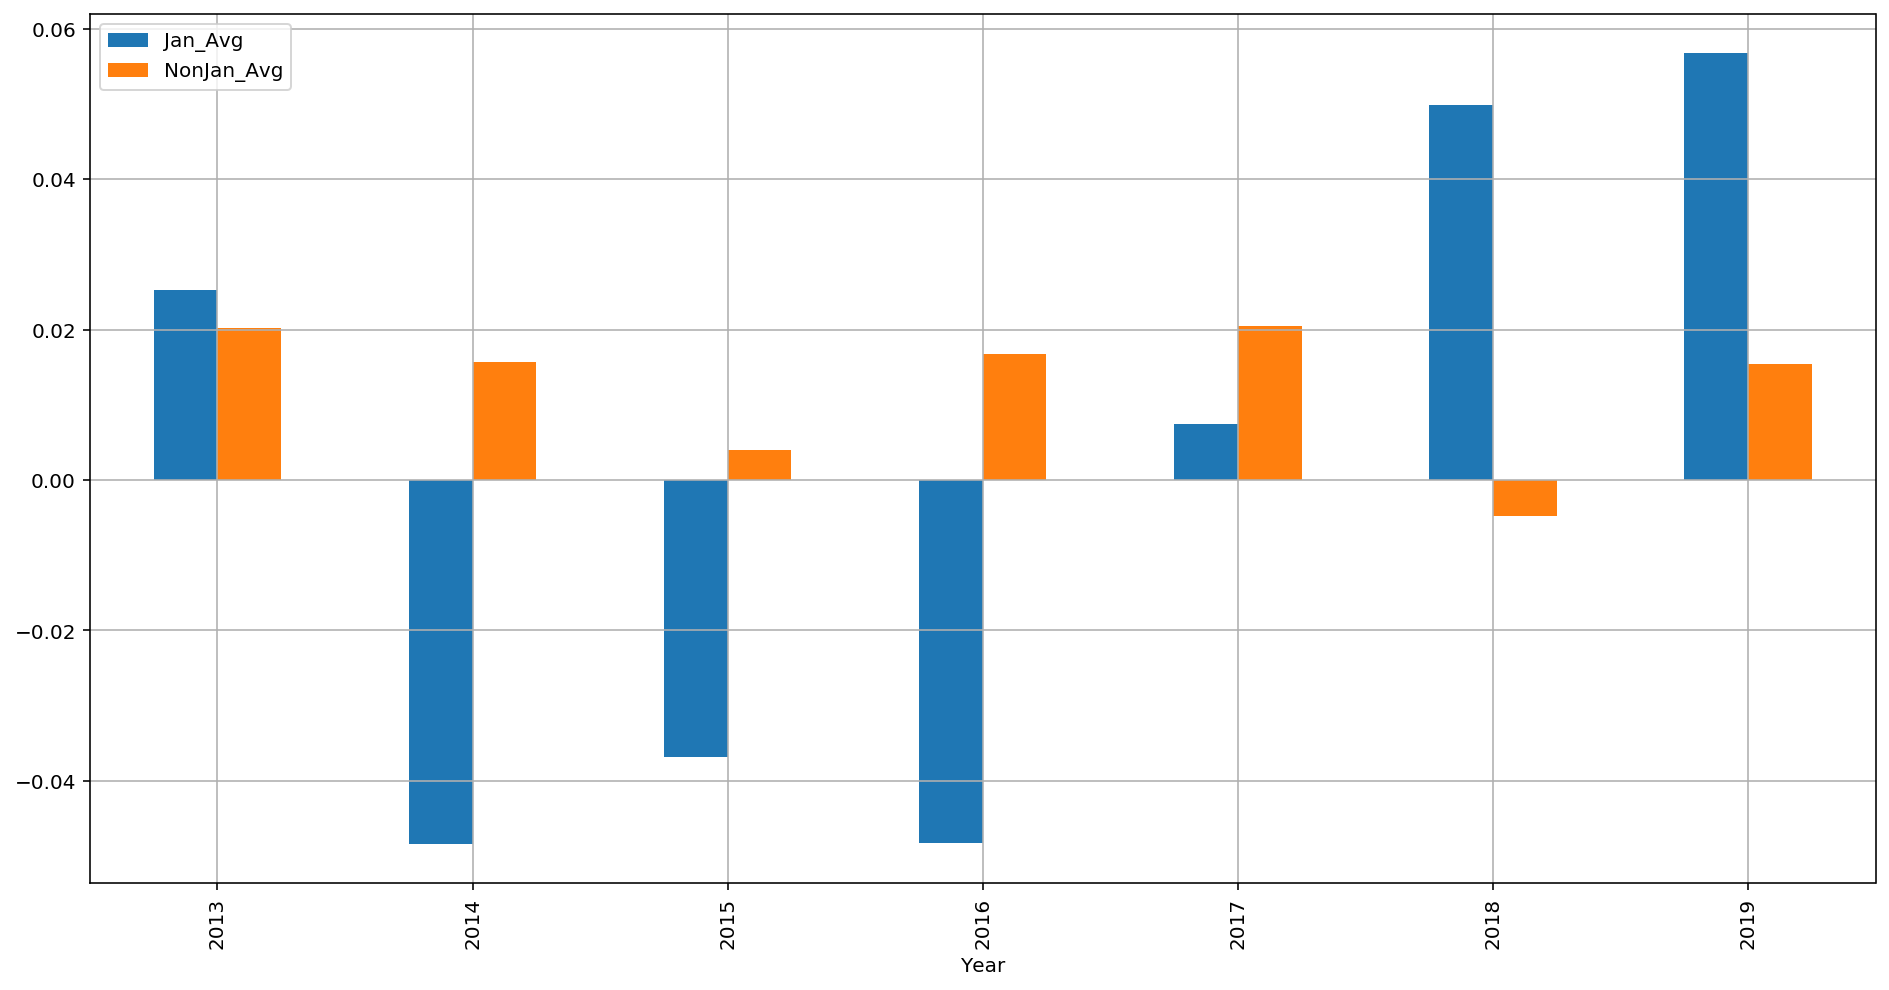

In [23]:
results_year.plot.bar(y=['Jan_Avg', 'NonJan_Avg'], figsize = (16,8) , grid=True);

### 8. Briefly explain whether the evidence is consistent with the January effect, and if not, name a couple of limitations of our dataset and/or approach.

- The evidence is not entirely consistent with the January effect. 
- We see for some years, the average jan return is higher than non-jan return (2018-2019). These three years had signficant p value of 5%
- None of the stocks showed a January effect WITH a significant p value (.10 or .05), which doesnt support the existence of the effect
- Limitations: different industries (i.e tech vs retail) may not be cross industry comparable when it comes to the January effect. Certain industries may exhibit this effect more than others. We may need a more diverse sample as well.
- These calculations also do not take into account events that lead economic downturns/anomalies. For example in times of recession, people don't feel positive about investing which downplays any possible January effect. 

### The following questions apply to a random sample of fifteen stocks that your group will select by running the following code 

### Random Stock Selection 

In [24]:
np.random.seed (1000 + 1) 
ticker_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']
stock_lst = np.random.choice(ticker_list,15,replace=False)
stock_lst

array(['WMT', 'PG', 'GS', 'MMM', 'INTC', 'JNJ', 'TRV', 'NKE', 'PFE', 'BA',
       'AAPL', 'AXP', 'MSFT', 'MRK', 'UNH'], dtype='<U4')

## PART II

### 1. Modify the returns_mon DataFrame to store only the monthly return for the fifteen stocks designated for your group. 

In [25]:
returns_mon_mod = returns_mon.copy()

for col in returns_mon_mod.columns:
    ticker = col[4:]
    if ticker not in stock_lst:
        returns_mon_mod.drop(col, axis=1, inplace=True)        

In [26]:
returns_mon_mod.head()

,RET_AAPL,RET_AXP,RET_BA,RET_GS,RET_INTC,RET_JNJ,RET_MMM,RET_MRK,RET_MSFT,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_WMT
Date,,,,,,,,,,,,,,,
2013-01-31,-0.186780,0.001021,-0.042407,0.116043,-0.016030,0.042560,0.059096,0.045167,-0.006174,0.041748,0.060227,0.087951,0.074049,0.012210,0.010202
2013-02-28,-0.025611,0.055239,0.046602,0.016160,0.003056,0.037164,0.039892,-0.012096,0.020915,0.015316,0.003294,0.013480,0.024674,-0.032398,0.011795
2013-03-29,0.002850,0.081984,0.110095,-0.017582,0.044952,0.068791,0.021969,0.043416,0.028720,0.080240,0.053009,0.011485,0.051476,0.071865,0.062074
2013-04-30,0.000271,0.016945,0.062754,-0.007366,0.092225,0.044382,-0.015165,0.061423,0.145777,0.074906,0.007251,0.003544,0.014387,0.046449,0.037893
2013-05-31,0.022172,0.101391,0.085096,0.107159,0.023061,-0.004907,0.057423,-0.006403,0.059941,-0.024281,-0.057086,-0.000131,-0.019985,0.044067,-0.031780


### 2. For each stock, compute the cumulative return series over the entire sample (no reset), and store the series in a new DataFrame named sample_ret.

In [27]:
sample_ret = (1+returns_mon_mod[:]).cumprod()-1

In [28]:
sample_ret.head()

,RET_AAPL,RET_AXP,RET_BA,RET_GS,RET_INTC,RET_JNJ,RET_MMM,RET_MRK,RET_MSFT,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_WMT
Date,,,,,,,,,,,,,,,
2013-01-31,-0.186780,0.001021,-0.042407,0.116043,-0.016030,0.042560,0.059096,0.045167,-0.006174,0.041748,0.060227,0.087951,0.074049,0.012210,0.010202
2013-02-28,-0.207607,0.056316,0.002219,0.134078,-0.013023,0.081305,0.101346,0.032524,0.014612,0.057703,0.063719,0.102617,0.100550,-0.020583,0.022118
2013-03-29,-0.205348,0.142917,0.112558,0.114139,0.031343,0.155690,0.125541,0.077353,0.043752,0.142574,0.120105,0.115280,0.157202,0.049803,0.085565
2013-04-30,-0.205133,0.162284,0.182375,0.105932,0.126459,0.206982,0.108473,0.143527,0.195907,0.228160,0.128227,0.119233,0.173851,0.098565,0.126700
2013-05-31,-0.187510,0.280129,0.282991,0.224443,0.152436,0.201059,0.172124,0.136204,0.267591,0.198339,0.063821,0.119087,0.150392,0.146975,0.090893


### 3a. Which stocks were the top three performers. What were their cumulative returns over the entire sample period?

In [29]:
sorted_sample=sample_ret.tail(1).iloc[:, np.argsort(sample_ret.loc[sample_ret.index[-1]])]
sorted_sample

,RET_GS,RET_PFE,RET_WMT,RET_MMM,RET_TRV,RET_AXP,RET_PG,RET_JNJ,RET_MRK,RET_INTC,RET_AAPL,RET_NKE,RET_BA,RET_UNH,RET_MSFT
Date,,,,,,,,,,,,,,,
2019-12-31,0.600979,0.781094,0.843223,0.988239,0.999589,1.023443,1.092973,1.326816,1.4919,1.95566,2.300798,2.862624,3.0305,4.302828,4.80606


In [30]:
sorted_sample.iloc[:, [-3,-2,-1]]

,RET_BA,RET_UNH,RET_MSFT
Date,,,
2019-12-31,3.0305,4.302828,4.80606


### 3b. Which stocks were the worst three performers. What were their cumulative returns over the entire sample period?

In [31]:
sorted_sample.iloc[:, [0,1,2]]

,RET_GS,RET_PFE,RET_WMT
Date,,,
2019-12-31,0.600979,0.781094,0.843223


### 3c. Create a line plot of the series for the stocks with the highest three and lowest three cumulative returns.

In [32]:
labels = sorted_sample.iloc[:, [-3,-2,-1]].columns
labels = labels.append(sorted_sample.iloc[:, [0,1,2]].columns)
labels

Index(['RET_BA', 'RET_UNH', 'RET_MSFT', 'RET_GS', 'RET_PFE', 'RET_WMT'], dtype='object')

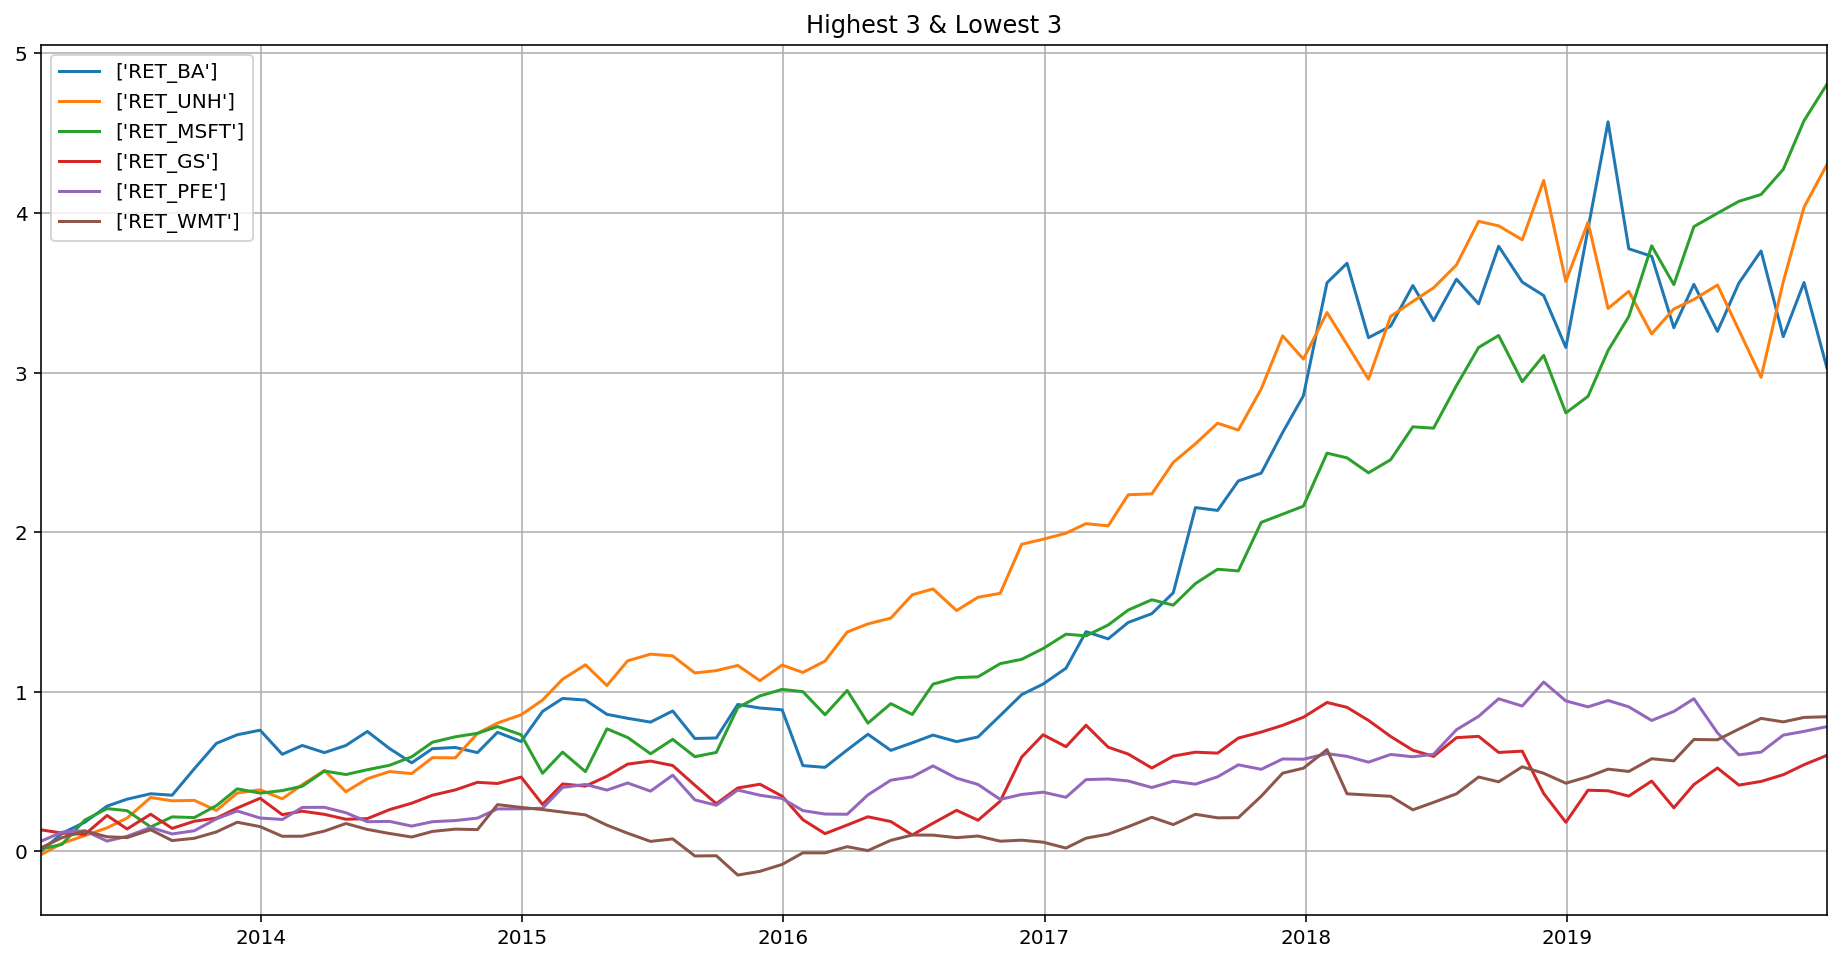

In [33]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)

for ticker in labels:
    ax.plot(sample_ret[ticker], label=[ticker])


ax.set_xlim(sample_ret.index[1], sample_ret.index[-1])       

ax.grid(True)

ax.set_title("Highest 3 & Lowest 3")

ax.legend(loc='best');

## PART III

### 1. Use the DataFrame returns_mon to create a new DataFrame named data_intial that only has the data from January 2013 to December 2017. In addition, create another DataFrame named data_post to store the 2018 and 2019 data.

In [34]:
data_initial = returns_mon['01/01/2013':'12/31/2017']
data_initial.head()

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.186780,0.001021,-0.042407,0.050977,0.011244,0.042217,0.052975,0.116043,0.052773,0.033652,...,0.060227,0.087951,0.074049,0.012210,0.041622,0.016151,-0.003430,0.010202,0.014104,1.0
2013-02-28,-0.025611,0.055239,0.046602,-0.063137,0.014000,0.024975,0.013091,0.016160,0.023336,-0.006892,...,0.003294,0.013480,0.024674,-0.032398,0.039427,0.013066,0.064811,0.011795,0.001689,0.0
2013-03-29,0.002850,0.081984,0.110095,-0.060239,0.001915,0.014155,0.039686,-0.017582,0.023997,0.060241,...,0.053009,0.011485,0.051476,0.071865,0.031310,0.068219,0.054780,0.062074,0.006234,0.0
2013-04-30,0.000271,0.016945,0.062754,-0.020399,0.009008,0.026493,0.101056,-0.007366,0.049895,-0.051762,...,0.007251,0.003544,0.014387,0.046449,-0.023171,-0.008158,0.102885,0.037893,-0.012507,0.0
2013-05-31,0.022172,0.101391,0.085096,0.013258,0.142336,0.014079,0.003812,0.107159,0.069892,0.031373,...,-0.057086,-0.000131,-0.019985,0.044067,0.044375,0.063219,-0.106165,-0.031780,0.023388,0.0


In [35]:
data_post = returns_mon['01/01/2018':'12/31/2019']
data_post.head()

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,-0.010693,0.004428,0.183671,0.037097,0.088638,0.001277,0.010732,0.050255,0.058260,0.064856,...,0.022387,-0.054600,0.100097,0.071415,0.078661,0.085761,0.032635,0.076492,0.042829,1.0
2018-02-28,0.065961,-0.019197,0.026807,-0.051364,0.075105,-0.103420,-0.052035,-0.015886,-0.097318,-0.039472,...,-0.010684,-0.094940,-0.075628,-0.045889,-0.018439,-0.008699,-0.124510,-0.169163,-0.131870,0.0
2018-03-30,-0.059804,-0.044349,-0.099576,-0.048021,-0.043123,0.018765,-0.026721,-0.043014,-0.016671,-0.015521,...,-0.022842,0.009633,0.004190,-0.051961,-0.068495,-0.027376,0.001674,-0.005677,-0.015032,0.0
2018-04-30,-0.015134,0.060733,0.017175,-0.015682,0.040127,0.092644,-0.001096,-0.055217,0.036143,-0.056787,...,0.031070,-0.082395,-0.053699,0.099549,-0.046111,0.058921,0.043998,-0.005749,0.041224,0.0
2018-05-31,0.126742,-0.004567,0.059239,0.050978,-0.036326,0.002187,-0.008609,-0.050122,0.015008,-0.014462,...,-0.009034,0.011408,-0.023682,0.021386,0.043757,0.031422,-0.034635,-0.062987,0.053994,0.0


### 2. Create a DataFrame named rf_rate to store the risk free rate over the period from January 2013 to December 2019. The risk-free rate  is available in the ff_factors19.csv file on Blackboard.

In [36]:
#reading in data
rf_rate = pd.read_csv("ff_factors19.csv",
                     index_col='dateff',
                     usecols=['dateff', 'rf'],
                     parse_dates=True)

rf_rate = rf_rate["2013/01/01":"2019/12/31"]
rf_rate

,rf
dateff,
2013-01-31,0.0000
2013-02-28,0.0000
2013-03-28,0.0000
2013-04-30,0.0000
2013-05-31,0.0000
...,...
2019-08-30,0.0016
2019-09-30,0.0018
2019-10-31,0.0015


### 3a. Use the DataFrames data_initial and rf_rate, in conjunction with Scipy' s minimize() function to find the optimal portfolio (highest Sharpe ratio) from the universe of stocks comprised of all the stocks in your sample. (Assume there are no short-selling constraints).

In [37]:
data_initial.head()# monthly returns

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.186780,0.001021,-0.042407,0.050977,0.011244,0.042217,0.052975,0.116043,0.052773,0.033652,...,0.060227,0.087951,0.074049,0.012210,0.041622,0.016151,-0.003430,0.010202,0.014104,1.0
2013-02-28,-0.025611,0.055239,0.046602,-0.063137,0.014000,0.024975,0.013091,0.016160,0.023336,-0.006892,...,0.003294,0.013480,0.024674,-0.032398,0.039427,0.013066,0.064811,0.011795,0.001689,0.0
2013-03-29,0.002850,0.081984,0.110095,-0.060239,0.001915,0.014155,0.039686,-0.017582,0.023997,0.060241,...,0.053009,0.011485,0.051476,0.071865,0.031310,0.068219,0.054780,0.062074,0.006234,0.0
2013-04-30,0.000271,0.016945,0.062754,-0.020399,0.009008,0.026493,0.101056,-0.007366,0.049895,-0.051762,...,0.007251,0.003544,0.014387,0.046449,-0.023171,-0.008158,0.102885,0.037893,-0.012507,0.0
2013-05-31,0.022172,0.101391,0.085096,0.013258,0.142336,0.014079,0.003812,0.107159,0.069892,0.031373,...,-0.057086,-0.000131,-0.019985,0.044067,0.044375,0.063219,-0.106165,-0.031780,0.023388,0.0


### 3b. The weights of the stocks in the optimal portfolio are:

### 3c. The optimal portfolio return is:

### 3d. The optimal portfolio standard deviation is:

### 3e. The Sharpe Ratio the optimal portfolio is:

### 4a. What is the return of the Global Minimum Variance Portfolio (GMVP)

### 4b. What is the standard deviation of the Global Minimum Variance Portfolio (GMVP)

### 4c. What are the weights of the stocks in the Global Minimum Variance Portfolio (GMVP)

### 5. Use Scipy's minimize() function to solve for the efficient frontier. In addition, plot it, add to the plot the fifteen stocks, the GMVP, the optimal portfolio, as well as the Capital Allocation Line.

## PART IV

### 1. Create a DataFrame named weights with three columns: 1) TICKER; 2) Optimal_Weights and 3) Equal_Weights for each ticker.

In [ ]:
# creating df
weights = pd.DataFrame(columns = ['TICKER', 'Optimal_Weights', 'Equal_Weights'])
weights

### 2. Using the DataFrames data_post and weights, compute the two portfolio (Optimal and Equal-weighted) monthy returns over the period January 1st, 2018 and December 31st, 2019. Store the portfolio returns into a new DataFrame named port_returns. Label the two columns as 'Optimal Portfolio' and 'EW_Portfolio'

In [ ]:
# we have to do part three before this

### 3. In a single output, provide summary statistics on the two portfolios.

In [ ]:
# one function

### 4a. Compute the two-year cumulative return series for both portfolios and plot them in the same graph. 

### 4b. What was the two-year cumulative return for the best performer? What was the two-year cumulative return for the worst performer?